In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# df1=pd.read_csv("../email spam classifier/spam.csv")

In [21]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [22]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data cleaning

In [23]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
df=df.rename(columns={'v1':'target','v2':'result'})

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [26]:
df.duplicated().sum()
df=df.drop_duplicates()

In [67]:
df['result'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# EDA

In [28]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

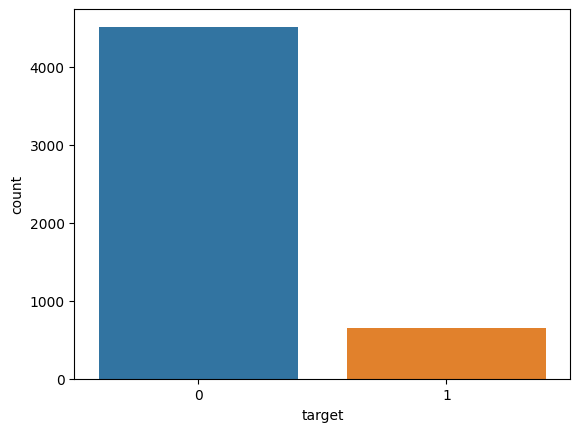

In [29]:
sns.countplot(data=df,x='target')

In [30]:
import nltk


In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adeeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df['num_characters']=df['result'].apply(len)
df['num_words']=df['result'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['result'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df

,target,result,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: xlabel='num_characters', ylabel='Count'>

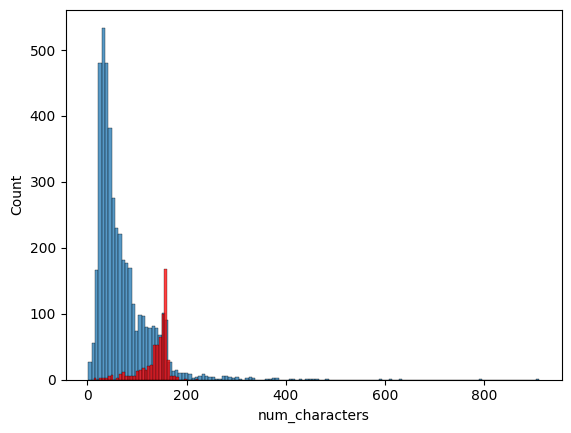

In [34]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

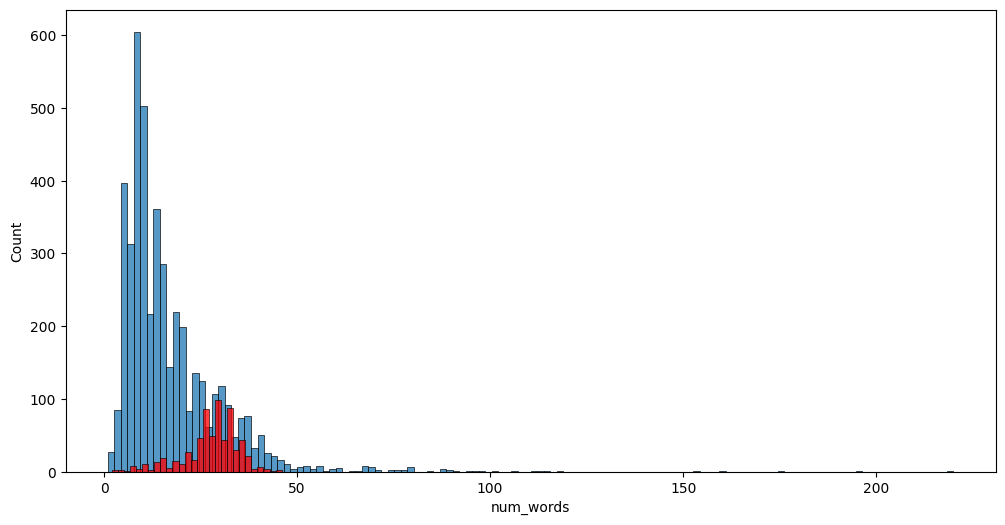

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

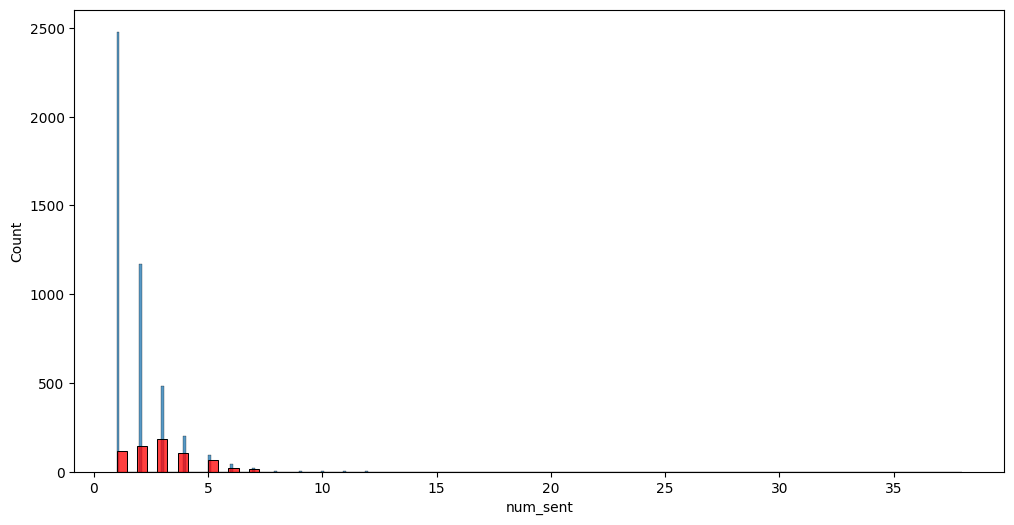

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

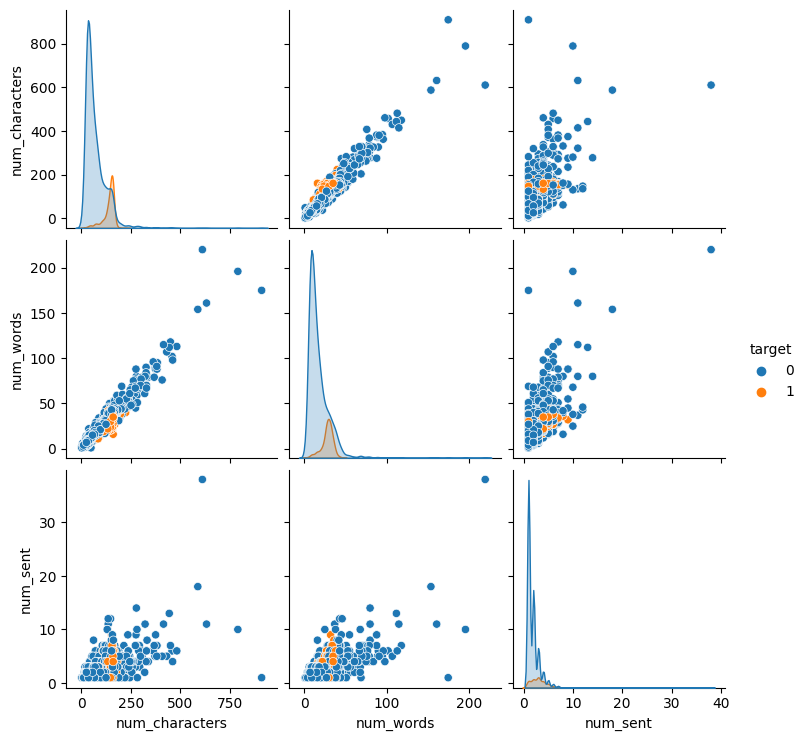

In [37]:
sns.pairplot(data=df,hue='target')

C:\Users\adeeb\AppData\Local\Temp\ipykernel_13820\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

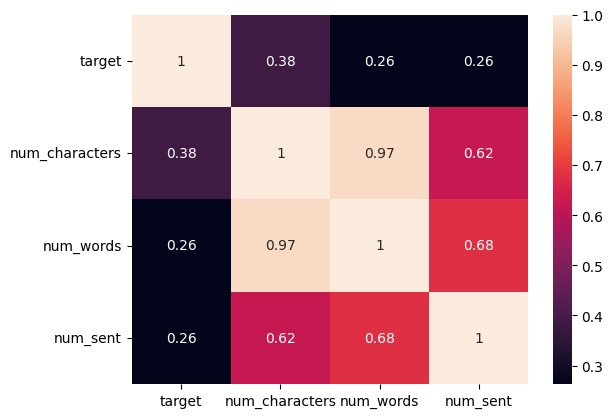

In [38]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing
### 1. convert to lower
### 2. tokenize the text basically take each word in a sentence and put it into a list
### 3. remove special characters
### 4. remove stop words

In [39]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]

    for char in text:
        if char.isalnum():
            y.append(char)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(i)

    return " ".join(y)

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
df['transformed_text']=df['result'].apply(transform_text)

In [43]:
df

,target,result,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u pound prize 2 claim...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

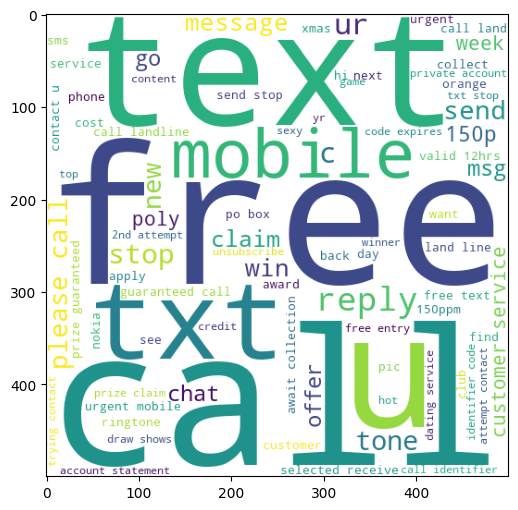

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

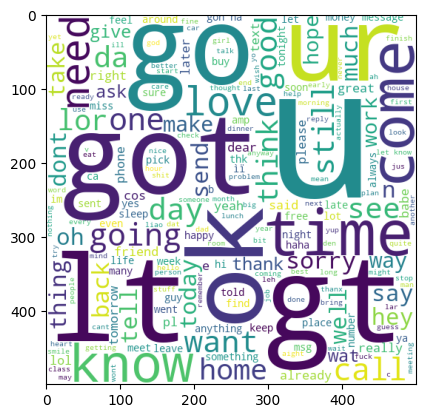

In [47]:
plt.imshow(ham_wc)

In [48]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 'pounds',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lc

In [49]:
from collections import Counter
common_spam=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [50]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
ham_corpus
common_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [51]:
common_ham

,0,1
0,u,883
1,get,293
2,gt,288
3,lt,287
4,2,284
5,go,240
6,got,236
7,know,225
8,like,221
9,ok,217


# Model Building

In [52]:
from sklearn.naive_bayes import *
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [53]:
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
# X=cv.fit_transform(df['transformed_text']).toarray()
y=df['target'].values

In [54]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,precision_score

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [64]:
mnb.fit(X_train,y_train)
y_preds=mnb.predict(X_test)

In [57]:
def evaluate(model):
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    print("accuracy score",accuracy_score(y_preds,y_test))
    print(classification_report(y_test,y_preds))
    print("precision score",precision_score(y_test,y_preds)) 

In [58]:
evaluate(gnb)

accuracy score 0.8723404255319149
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       889
           1       0.53      0.81      0.64       145

    accuracy                           0.87      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.87      0.88      1034

precision score 0.5291479820627802


In [59]:
evaluate(mnb)

accuracy score 0.9758220502901354
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.95      1034
weighted avg       0.98      0.98      0.97      1034

precision score 1.0


In [60]:
evaluate(bnb)

accuracy score 0.9729206963249516
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.83      0.90       145

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

precision score 0.968


In [ ]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker for generating random data
fake = Faker()

# Define possible traffic sources and channels
sources = [
    ('google', 'organic'), 
    ('facebook', 'social'), 
    ('direct', 'direct'), 
    ('bing', 'organic'),
    ('instagram', 'social'), 
    ('email', 'email'), 
    ('twitter', 'social'),
    ('paid_search', 'cpc'), 
    ('referral_site', 'referral')
]

channels = {
    'organic': 'Organic Search',
    'social': 'Social',
    'direct': 'Direct',
    'email': 'Email',
    'cpc': 'Paid Search',
    'referral': 'Referral'
}

# Number of records to generate
num_records = 100

# Generate traffic source data
traffic_data = {
    "Visitor ID": [fake.uuid4() for _ in range(num_records)],
    "Session ID": [fake.uuid4() for _ in range(num_records)],
    "Date": [fake.date_this_year() for _ in range(num_records)],
    "Source/Medium": [f"{source}/{medium}" for source, medium in random.choices(sources, k=num_records)],
    "Channel": [channels[medium] for _, medium in random.choices(sources, k=num_records)],
    "Page": [random.choice(['/home', '/product', '/checkout', '/about', '/contact']) for _ in range(num_records)],
    "Conversion": [random.choice([0, 1]) for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(traffic_data)

# Save the dataset to a CSV file
csv_file_path = "traffic_data.csv"
df.to_csv(csv_file_path, index=False)

# Load the dataset from the saved CSV file
data = pd.read_csv(csv_file_path)

# Group by Source/Medium to see traffic distribution
traffic_distribution = data.groupby('Source/Medium').size().reset_index(name='Session Count')

print("Traffic Distribution by Source/Medium:")
print(traffic_distribution)

# Group by Channel to see traffic distribution across channels
channel_distribution = data.groupby('Channel').size().reset_index(name='Session Count')

print("\nTraffic Distribution by Channel:")
print(channel_distribution)

# Calculate conversion rate by Source/Medium
conversion_rate_by_source = data.groupby('Source/Medium').apply(
    lambda x: (x['Conversion'].sum() / len(x)) * 100
).reset_index(name='Conversion Rate (%)')

print("\nConversion Rate by Source/Medium:")
print(conversion_rate_by_source)

# Calculate conversion rate by Channel
conversion_rate_by_channel = data.groupby('Channel').apply(
    lambda x: (x['Conversion'].sum() / len(x)) * 100
).reset_index(name='Conversion Rate (%)')

print("\nConversion Rate by Channel:")
print(conversion_rate_by_channel)


In [66]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))